In [1]:
#--------------------------------------------------------------
#Libraries included
#--------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB  #used for text classsification problem
from sklearn import metrics         #it contain functions for evaluating the performance of ml model, like accuracy, precision and other.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #helps in understanding the performance of classifier.
from matplotlib import pyplot as plt           #creating static, animated and interacted visualization
from sklearn.linear_model import PassiveAggressiveClassifier #it is used where model can be updated new data without retraining from scratch.
import itertools    #Provides functions like product() for generating combinations of elements from input iterables  
                    #and combinations() for creating subsets of elements.
import numpy as np  #is essential for tasks like data manipulation, linear algebra operations, random number generation, and more. 


In [2]:

#--------------------------------------------------------------
# Importing dataset using pandas dataframe
#--------------------------------------------------------------
df = pd.read_csv("D:\\FakeNewss\\fake_or_real_news.csv")


In [3]:
# Inspect shape of df
print(df.shape)


(6335, 4)


In [4]:

# Print first few lines of df
print(df.head())



   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [5]:

# Display the columns to check for 'Unnamed: 0'
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [6]:

# If 'Unnamed: 0' is present, set it as the index
if 'Unnamed: 0' in df.columns:
    df = df.set_index('Unnamed: 0')
else:
    print("Column 'Unnamed: 0' not found. Available columns are:", df.columns)


In [7]:

# Print first lines of df
print(df.head())

                                                        title  \
Unnamed: 0                                                      
8476                             You Can Smell Hillary’s Fear   
10294       Watch The Exact Moment Paul Ryan Committed Pol...   
3608              Kerry to go to Paris in gesture of sympathy   
10142       Bernie supporters on Twitter erupt in anger ag...   
875          The Battle of New York: Why This Primary Matters   

                                                         text label  
Unnamed: 0                                                           
8476        Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294       Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608        U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142       — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
875         It's primary day in New York and front-runners...  REAL  


In [8]:
#--------------------------------------------------------------
# Separate the labels and set up training and test datasets
#--------------------------------------------------------------
y = df.label

# Drop the label column
df.drop("label", axis=1, inplace=True)  # where numbering of news article is done that column is dropped in dataset

# Make training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)



#--------------------------------------------------------------
# Building the Count and Tfidf Vectors
# tfidf vectors are generally the -ve interger, or float values and count vectors are
#the interger values
#--------------------------------------------------------------
#str:["My name is ANkita" ,//0
#    "I am 20 years old"]//1
# Initialize the count_vectorizer ---- which converts text into a matrix of token counts, excluding English stop words.
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
count_train = count_vectorizer.fit_transform(X_train)  # Learn the vocabulary dictionary and return term-document matrix.

# Transform the test set
count_test = count_vectorizer.transform(X_test)


# Initialize the tfidf_vectorizer ---which converts text into a matrix of TF-IDF features, excluding English stop words and terms that appear in more than 70% of the articles
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)  # This removes words which appear in more than 70% of the articles

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test set
tfidf_test = tfidf_vectorizer.transform(X_test)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

difference = set(count_df.columns) - set(tfidf_df.columns)

print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

print(count_df.head())

print(tfidf_df.head())



set()
False
   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0

In [10]:

#--------------------------------------------------------------
# Function to plot the confusion matrix
#Plotting a confusion matrix is crucial for gaining a detail understanding of the model’s performance, identifying areas of improvement
#--------------------------------------------------------------

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



accuracy:   0.857


Confusion matrix, without normalization
[[ 739  269]
 [  31 1052]]
accuracy:   0.893
Confusion matrix, without normalization
[[ 865  143]
 [  80 1003]]


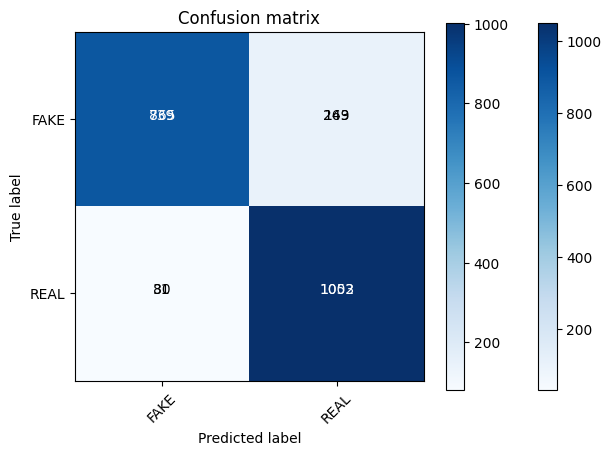

In [11]:

#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model
#--------------------------------------------------------------
#it assume feature is conditinally independent

clf = MultinomialNB()

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y

pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB()

clf.fit(count_train, y_train)

pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


accuracy:   0.935
Confusion matrix, without normalization
[[ 951   57]
 [  78 1005]]
Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000


c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:627: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892
FAKE -5.03851177366588 2016
FAKE -4.072582149063963 hillary
FAKE -4.039152893513516 october
FAKE -3.1823692007101596 article
FAKE -3.066900024826035 share
FAKE -2.918436682905499 november
FAKE -2.5123095189113185 print
FAKE -2.334574781167009 oct
FAKE -2.3281955222918187 source
FAKE -2.307878809917056 podesta
FAKE -2.265812208222702 advertisement
FAKE -2.2086908536858645 email
FAKE -2.116460843644308 war
FAKE -2.108335175513521 election
FAKE -2.083870372716056 mosul
FAKE -2.060951445140615 nov
FAKE -1.9435045782955462 corporate
FAKE -1.8778680568399522 pipeline
FAKE -1.8560877664131104 establishment
FAKE -1.820576442994636 wikileaks
FAKE -1.8035601087779771 26
FAKE -1.7917834412746791 jewish
FAKE -1.7552498913156702 brexit
FAKE -1.7427872804048656 ayotte
FAKE -1.715028241200696 com
FAKE -1.6870584972939284 dr
FAKE -1.677481639

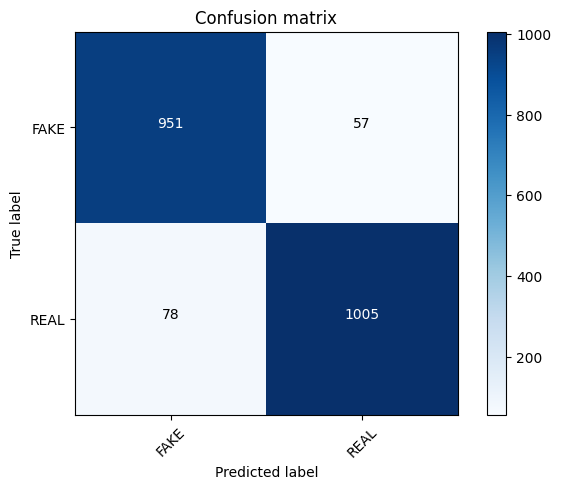

In [12]:

#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------
linear_clf = PassiveAggressiveClassifier(max_iter=50) # Use max_iter instead of n_iter

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

clf = MultinomialNB(alpha=0.1)               


last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))


def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):       # inspect the top 30 vectors for fake and real news
    """
    See: https://stackoverflow.com/a/26980472

    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()                                            # Array mapping from feature integer indices to feature name
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)
feature_names = tfidf_vectorizer.get_feature_names_out()


In [13]:

### Most real
sorted(zip(clf.feature_log_prob_[0], feature_names), reverse=True)[:20]

### Most fake
sorted(zip(clf.feature_log_prob_[0], feature_names))[:20]                               # clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

tokens_with_weights = sorted(list(zip(feature_names, clf.feature_log_prob_[0])))
#print(tokens_with_weights)

In [14]:

from sklearn.feature_extraction.text import HashingVectorizer

#--------------------------------------------------------------
# HashingVectorizer : require less memory and are faster (because they are sparse and use hashes rather than tokens)
#--------------------------------------------------------------


hash_vectorizer = HashingVectorizer(stop_words='english') # Removed non_negative argument as it's no longer supported
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)


accuracy:   0.918
Confusion matrix, without normalization
[[931  77]
 [ 94 989]]


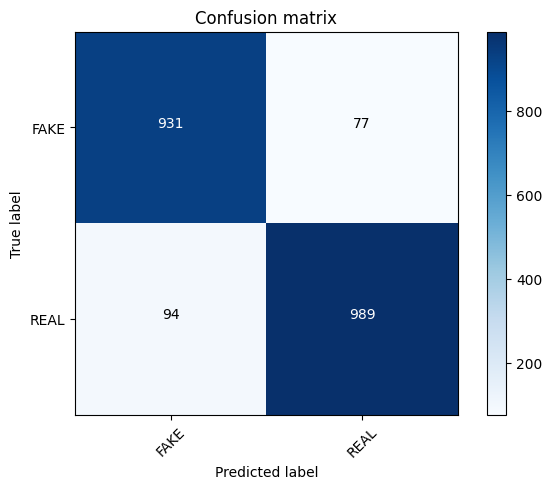

In [15]:

#--------------------------------------------------------------
# Applying Passive Aggressive Classifier , model can be updated with new data without retraining from scratch.
#--------------------------------------------------------------
clf = PassiveAggressiveClassifier(max_iter=50)
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ankita chaturvedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear fa

Best parameters: {'C': 1}
Best cross-validation score: 0.9311940240460475
Test set accuracy: 0.936
Confusion matrix, without normalization
[[969  39]
 [ 94 989]]


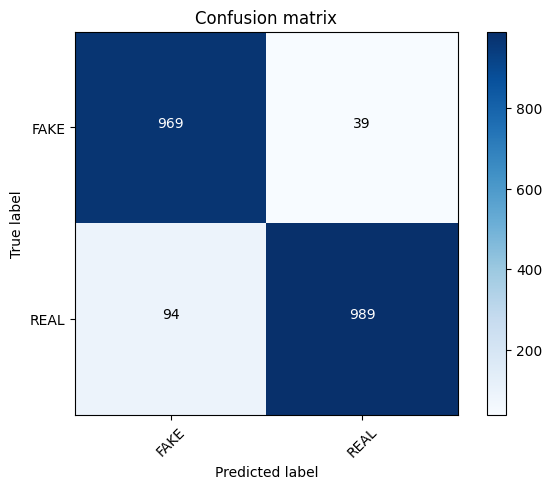

In [16]:
#it create hyperplane , 1st is reliable other unreliable 
#it is used to separate data into 2 classes(true or false)
#It looks for a line that maximizes the distance between the closest fake and real news points to this line.
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100]
}

# Initialize the SVM model
svm = LinearSVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(tfidf_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
best_svm = grid_search.best_estimator_
pred = best_svm.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("Test set accuracy: {:.3f}".format(score))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)
